# **Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM

from tensorflow.keras import losses
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Masking

from tensorflow.keras.layers import Input, Conv1D, concatenate, Dense, MaxPooling1D, Flatten

import os

In [ ]:
df = pd.read_csv('/content/train_FD001.txt', sep=" ", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


The last two columns return a NaN value due to the text file having 2 end spaces, for further pre-processing, we drop them...

In [ ]:
#df.drop(df.iloc[:, 26], axis = 1)
#df.drop(df.iloc[:, 27], axis = 1)
#df
df = df.drop(df.columns[27], axis=1)
df = df.drop(df.columns[26], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


The data consists of the following columns:


*   Engine Unit Number
*   Time (In Cycles)
*   Operating Settings 1
*   Operating Settings 2
*   Operating Settings 3
*   Sensor Readings 1
*   ...
*   ...
*   ...
*   Sensor Readings 21

In [ ]:
df.columns = df.columns.astype(str)
column_names = df.columns
print(column_names)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25'],
      dtype='object')


There are two kinds of features unique to time series: **time-step features** and **lag features**.

Time-step features are features we can derive directly from the time index. The most basic time-step feature is the time dummy, which counts off time steps in the series from beginning to end.

With respect to this particular dataset, the Time_In_cycles is the time dummy variable equivalent.

In [ ]:
# Renaming columns with new names
# df = df.rename(columns={'': 'Engine_Unit_Number', '': 'Time_In_Cycles', '': 'Operating_settings_1', '': 'Operating_settings_2', '': 'Operating_settings_3', '': 'Sensor_readings_1', '': 'Sensor_readings_2', '': 'Sensor_readings_3', '': 'Sensor_readings_4', '': 'Sensor_readings_5', '': 'Sensor_readings_6', '': 'Sensor_readings_7', '': 'Sensor_readings_8', '': 'Sensor_readings_9', '': 'Sensor_readings_10', '': 'Sensor_readings_11', '': 'Sensor_readings_12', '': 'Sensor_readings_13', '': 'Sensor_readings_14', '': 'Sensor_readings_15', '': 'Sensor_readings_16', '': 'Sensor_readings_17', '': 'Sensor_readings_18', '': 'Sensor_readings_19', '': 'Sensor_readings_20', '': 'Sensor_readings_21'})
df = df.rename(columns={'0': 'Engine_Unit_Number', '1': 'Time_In_Cycles', '2': 'Operating_settings_1', '3': 'Operating_settings_2', '4': 'Operating_settings_3', '5': 'Sensor_readings_1', '6': 'Sensor_readings_2', '7': 'Sensor_readings_3', '8': 'Sensor_readings_4', '9': 'Sensor_readings_5', '10': 'Sensor_readings_6', '11': 'Sensor_readings_7', '12': 'Sensor_readings_8', '13': 'Sensor_readings_9', '14': 'Sensor_readings_10', '15': 'Sensor_readings_11', '16': 'Sensor_readings_12', '17': 'Sensor_readings_13', '18': 'Sensor_readings_14', '19': 'Sensor_readings_15', '20': 'Sensor_readings_16', '21': 'Sensor_readings_17', '22': 'Sensor_readings_18', '23': 'Sensor_readings_19', '24': 'Sensor_readings_20', '25': 'Sensor_readings_21'})
df

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,...,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_18,Sensor_readings_19,Sensor_readings_20,Sensor_readings_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [ ]:
df.describe()

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,...,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_18,Sensor_readings_19,Sensor_readings_20,Sensor_readings_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


For terms with 0 Standard Deviation, there is no correlation. In loose conceptual terms, a correlation tells us about how one variable moves around wrt the other variable. An SD of 0 implies that variable is not 'moving around'. As such we may drop Sensor Readings having a Standard Deviation of 0, and create a new dataframe, allowing us to play around with and experiment on both variations of the dataframe...

Also note the standard deviation of Operating_Settings_1, and Operating_Settings_2, they aren't exactly null, but the fluctuations are so small however, that no other operating conditions can be identified.

In [ ]:
df.std()

Engine_Unit_Number      2.922763e+01
Time_In_Cycles          6.888099e+01
Operating_settings_1    2.187313e-03
Operating_settings_2    2.930621e-04
Operating_settings_3    0.000000e+00
Sensor_readings_1       0.000000e+00
Sensor_readings_2       5.000533e-01
Sensor_readings_3       6.131150e+00
Sensor_readings_4       9.000605e+00
Sensor_readings_5       1.776400e-15
Sensor_readings_6       1.388985e-03
Sensor_readings_7       8.850923e-01
Sensor_readings_8       7.098548e-02
Sensor_readings_9       2.208288e+01
Sensor_readings_10      0.000000e+00
Sensor_readings_11      2.670874e-01
Sensor_readings_12      7.375534e-01
Sensor_readings_13      7.191892e-02
Sensor_readings_14      1.907618e+01
Sensor_readings_15      3.750504e-02
Sensor_readings_16      1.387812e-17
Sensor_readings_17      1.548763e+00
Sensor_readings_18      0.000000e+00
Sensor_readings_19      0.000000e+00
Sensor_readings_20      1.807464e-01
Sensor_readings_21      1.082509e-01
dtype: float64

Note that sensors, 5, 6 and 16 have very little fluctuation, while sensors 9 and 14 have the highest fluctuations...

In [ ]:
#df_xstd = df_xstd.drop(df_xstd.columns[23], axis=1)
#df_xstd = df_xstd.drop(df_xstd.columns[22], axis=1)
#df_xstd = df_xstd.drop(df_xstd.columns[14], axis=1)
#df_xstd = df_xstd.drop(df_xstd.columns[5], axis=1)

#df_xstd

# Dropping columns
drop_columns = ['Sensor_readings_18', 'Sensor_readings_19', 'Sensor_readings_10', 'Sensor_readings_1']
df = df.drop(drop_columns, axis = 1)
drop_columns = ['Operating_settings_1', 'Operating_settings_2', 'Operating_settings_3']
df = df.drop(drop_columns, axis = 1)

df

,Engine_Unit_Number,Time_In_Cycles,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,Sensor_readings_6,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21
0,1,1,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,39.06,23.4190
1,1,2,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,39.00,23.4236
2,1,3,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,38.95,23.3442
3,1,4,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,38.88,23.3739
4,1,5,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,38.49,22.9735
20627,100,197,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,38.30,23.1594
20628,100,198,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,38.44,22.9333
20629,100,199,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,38.29,23.0640


In [ ]:
def add_remaining_useful_life(df):
    # Getting the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="Engine_Unit_Number")
    max_cycle = grouped_by_unit["Time_In_Cycles"].max()

    # Merging the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='Engine_Unit_Number', right_index=True)

    # Calculating remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["Time_In_Cycles"]
    result_frame["RUL"] = remaining_useful_life

    # dropping max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

df = add_remaining_useful_life(df)
df.head()

,Engine_Unit_Number,Time_In_Cycles,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,Sensor_readings_6,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,RUL
0,1,1,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,38.90,23.4044,187


In [ ]:
# # Getting the unique engine numbers
# engine_numbers = df.iloc[:, 0].unique()

# # Creating a list to store the data for each engine
# data_list = []

# # Looping through each engine number
# for engine in engine_numbers:
#     # Getting the data for the current engine
#     engine_data = df[df.iloc[:, 0] == engine]

#     # Dropping the engine number column
#     engine_data = engine_data.drop(engine_data.columns[0], axis=1)

#     # Converting the data to a numpy array and add it to the list
#     data_list.append(engine_data.to_numpy())

# # Converting the list of arrays to a 3D numpy array
# data_3d = np.stack(data_list, axis=0)

# # The resulting 3D array will have dimensions (samples, time steps, features)
# print(data_3d.shape)

# **Data Visualisations**

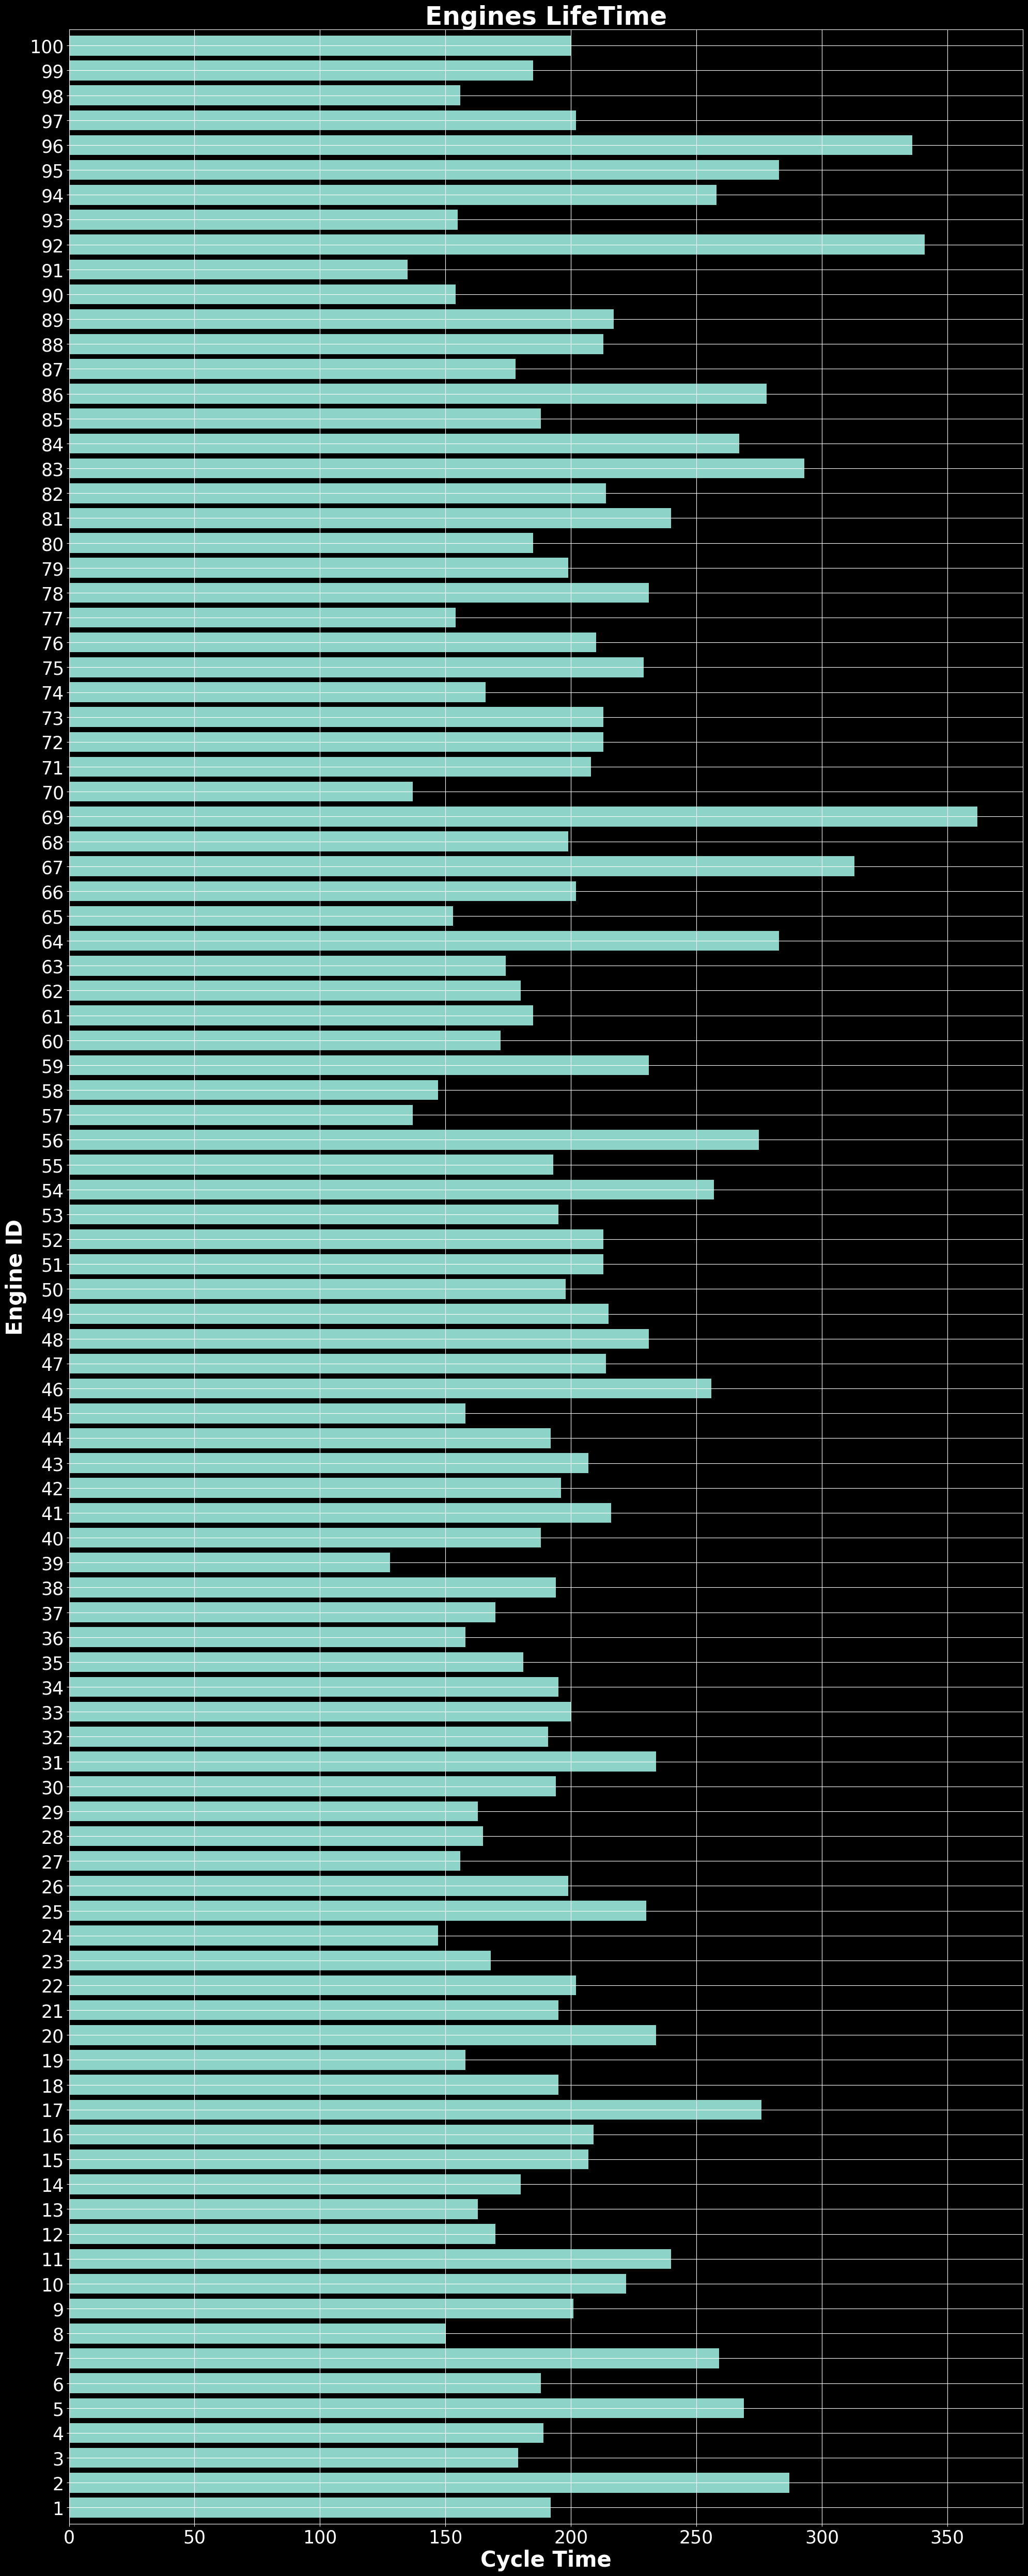

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,50))
ax=df.groupby('Engine_Unit_Number')['Time_In_Cycles'].max().plot(kind='barh',width=0.8, stacked=True,align='center',rot=0)
plt.title('Engines LifeTime',fontweight='bold',size=35)
plt.xlabel('Cycle Time',fontweight='bold',size=30)
plt.xticks(size=25)
plt.ylabel('Engine ID',fontweight='bold',size=30)
plt.yticks(size=25)
plt.grid(True)
plt.tight_layout()
plt.show()

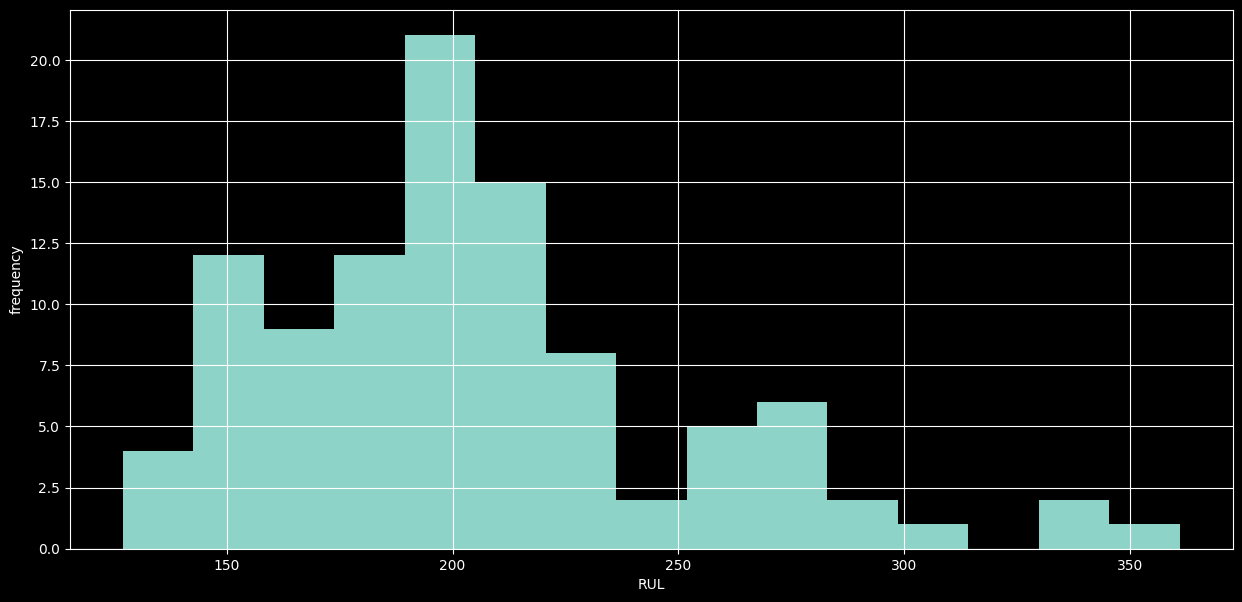

In [ ]:
df_max_rul = df[['Engine_Unit_Number', 'RUL']].groupby('Engine_Unit_Number').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

In [ ]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in df['Engine_Unit_Number'].unique():
        if (i % 10 == 0):  # only plot every 10th Engine_Unit_Number
            plt.plot('RUL', sensor_name,
                     data=df[df['Engine_Unit_Number']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

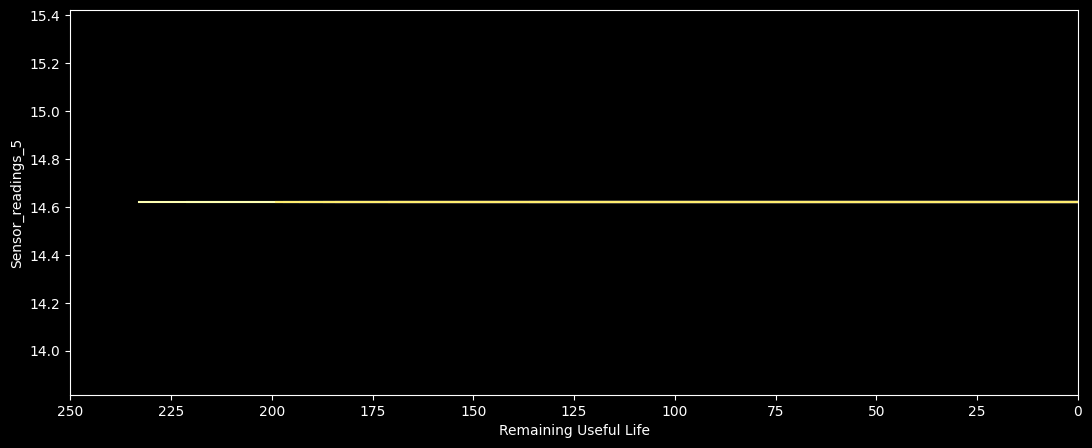

In [ ]:
plot_sensor("Sensor_readings_5")

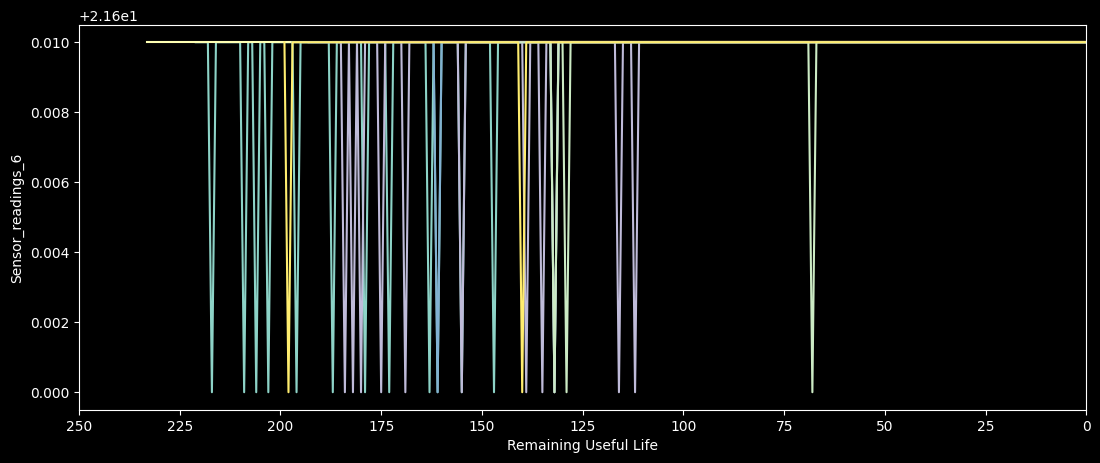

In [ ]:
plot_sensor("Sensor_readings_6")

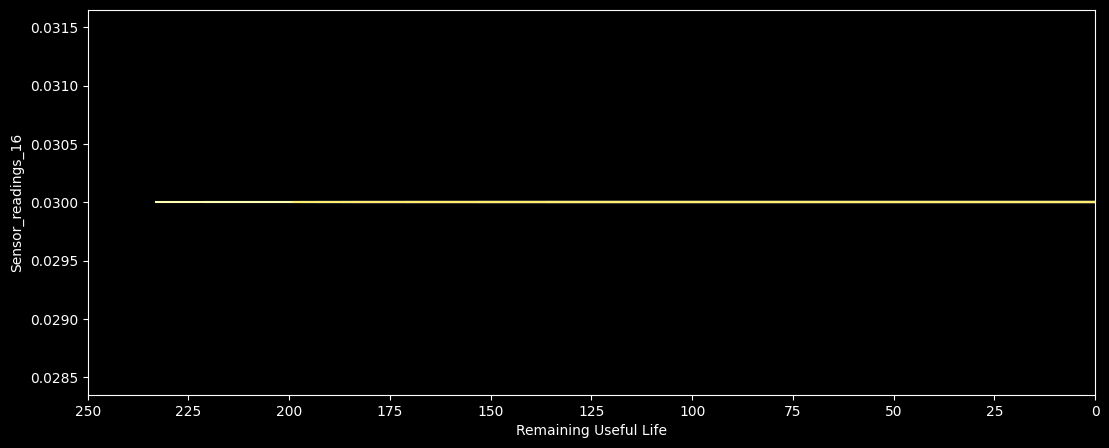

In [ ]:
plot_sensor("Sensor_readings_16")

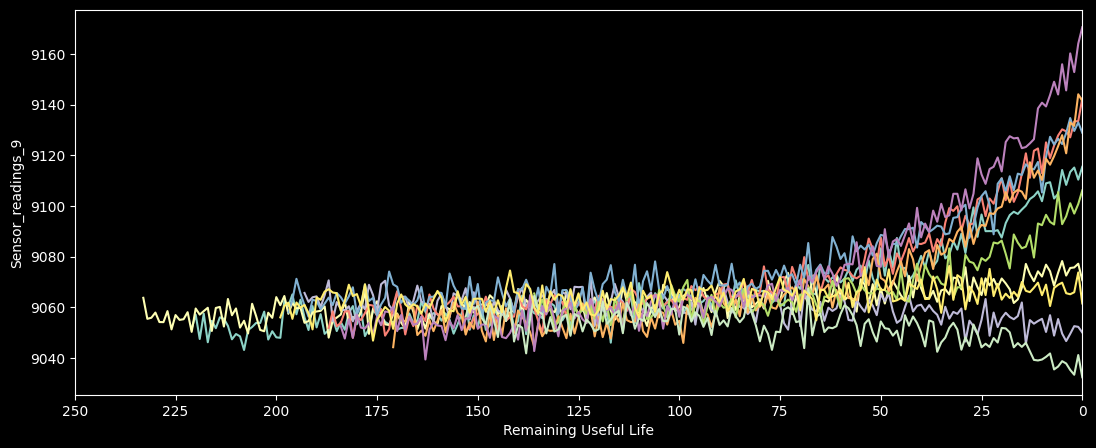

In [ ]:
plot_sensor("Sensor_readings_9")

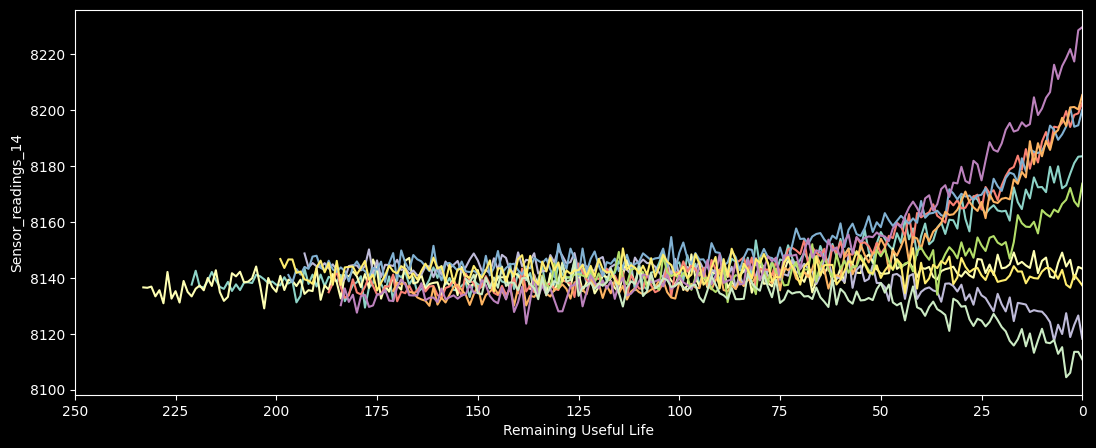

In [ ]:
plot_sensor("Sensor_readings_14")

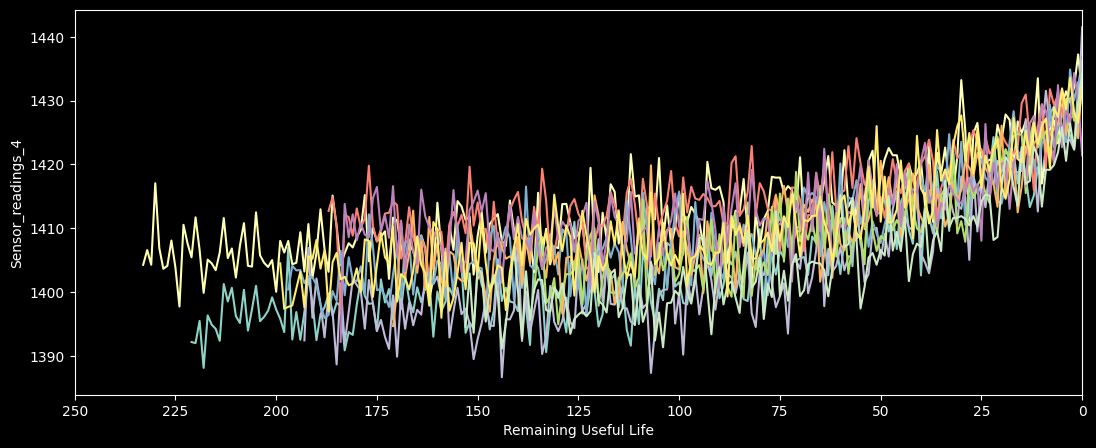

In [ ]:
plot_sensor("Sensor_readings_4")

In [ ]:
# Previously we assumed RUL to decline linearly over time.
# However, this may influence our overall model performance.
# Looking at the sensor signals many sensors seem rather constant in the beginning.
# This is because the engines only develop a fault over time.
# The bend in the curve of the signal is the first bit of information
# provided to us that the engine is degrading and the first time it is reasonable
# to assume RUL is linearly declining.
# We can’t really say anything about the RUL before that point as
# we have no information about the initial wear and tear.

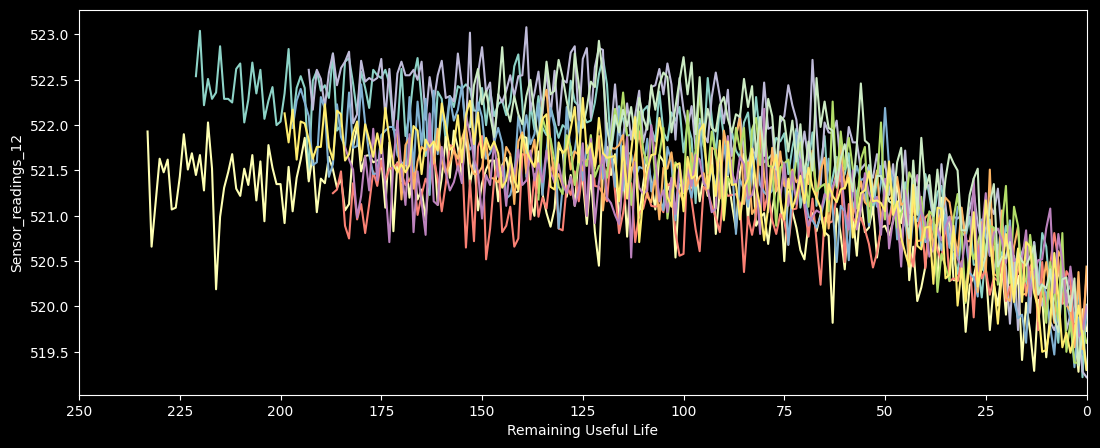

In [ ]:
plot_sensor("Sensor_readings_12")

In [ ]:
# We can update our assumption to reflect this logic.
# Instead of having our RUL decline linearly,
# we define our RUL to start out as a constant and only decline linearly after some time.

# By doing so we achieve 2 things:

# Initially constant RUL correlates better with the initially constant mean sensor signal.
# Lower peak values for RUL result in lower spread of our target variable, making it easier to fit a line.

# Consequently, this change allows our regression model to more accurately predict low RUL values,
# which are often more interesting/critical to predict correctly.

In [ ]:
drop_columns = ['Sensor_readings_5', 'Sensor_readings_6', 'Sensor_readings_16']
df = df.drop(drop_columns, axis = 1)
df.head()

,Engine_Unit_Number,Time_In_Cycles,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


# **Normalisation**

In [ ]:
# Selecting columns for normalization
columns_to_normalize = ['Sensor_readings_2',	'Sensor_readings_3',	'Sensor_readings_4',	'Sensor_readings_7',	'Sensor_readings_8', 'Sensor_readings_9',	'Sensor_readings_11',	'Sensor_readings_12',	'Sensor_readings_13',	'Sensor_readings_14',	'Sensor_readings_15',	'Sensor_readings_17',	'Sensor_readings_20',	'Sensor_readings_21']

# Extracting the columns to be normalized
columns_data = df[columns_to_normalize]

# Performing the Min-Max normalization on selected columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(columns_data)

# Updating the DataFrame with normalized values
df[columns_to_normalize] = normalized_data

df

,Engine_Unit_Number,Time_In_Cycles,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,RUL
0,1,1,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191
1,1,2,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190
2,1,3,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189
3,1,4,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188
4,1,5,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1


Note for self: Plots for Normalise - RMS, RMS - Normalise? Deriving conclusions from which set?

# **RMS?**

In [ ]:
# Function to plot RMS values of individual engines wrt time.

def plot_engine_rms(engine):
    # Selecting the sensor readings columns
    sensor_columns = [col for col in df.columns if 'Sensor_readings' in col]
    sensor_data = df[sensor_columns]

    def rms(data):
        return np.sqrt(np.mean(data**2, axis=1))

    # Calculating the RMS of the sensor data for the specified engine
    engine_data = sensor_data[df['Engine_Unit_Number'] == engine]
    rms_values = rms(engine_data)

    # Getting the corresponding 'Time_In_Cycles' values for the specified engine
    time_in_cycles = df[df['Engine_Unit_Number'] == engine]['Time_In_Cycles']

    # Plotting the RMS values for the specified engine
    plt.plot(time_in_cycles, rms_values)
    plt.xlabel('Engine_Runs')
    plt.ylabel('RMS')
    plt.title(f'Engine {engine}')
    plt.show()

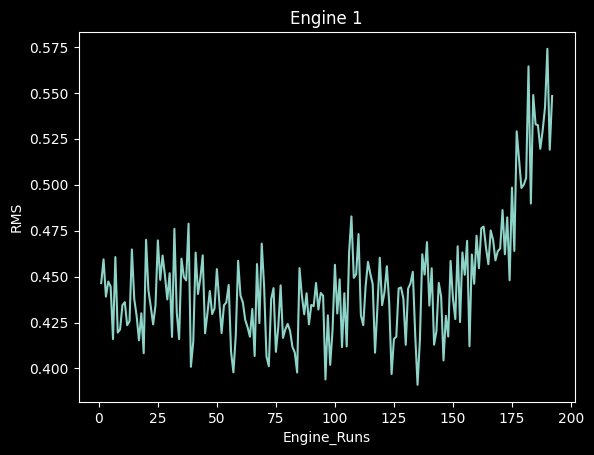

In [ ]:
plot_engine_rms(1)

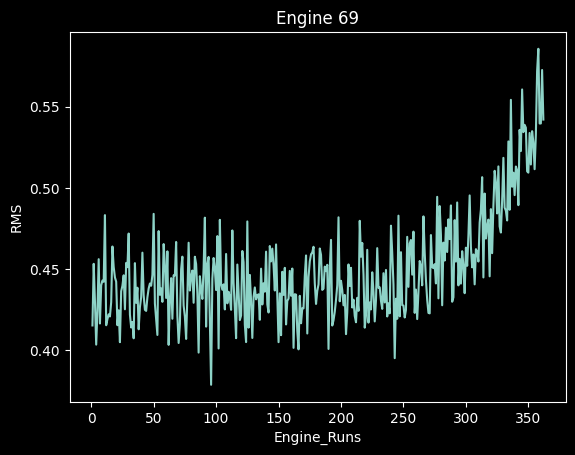

In [ ]:
plot_engine_rms(69)

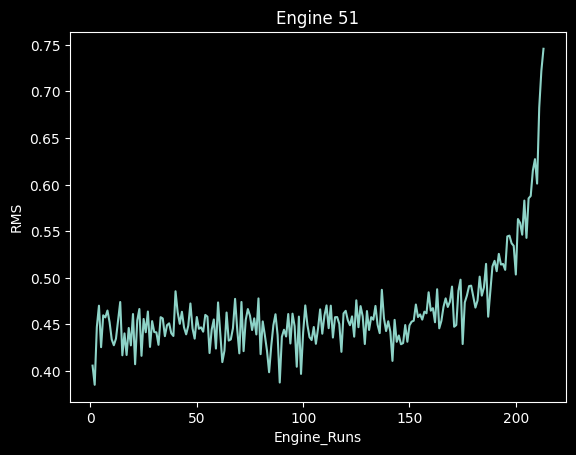

In [ ]:
plot_engine_rms(51)

In [ ]:
# Plot the RMS values and moving averages for the specified engine from the FD001 dataset.
def plot_engine_rms_with_moving_average(engine, window_size):
    # Selecting the sensor readings columns
    sensor_columns = [col for col in df.columns if 'Sensor_readings' in col]
    sensor_data = df[sensor_columns]

    def rms(data):
        return np.sqrt(np.mean(data**2, axis=1))

    # Calculating the RMS of the sensor data for the specified engine
    engine_data = sensor_data[df['Engine_Unit_Number'] == engine]
    rms_values = rms(engine_data)

    # Calculating the moving average of the RMS values
    moving_average = rms_values.rolling(window=window_size).mean()

    # Plotting the RMS values and moving averages for the specified engine
    plt.plot(rms_values, label='RMS Values')
    plt.plot(moving_average, label=f'Moving Average (Window Size = {window_size})', linestyle='dashed')
    plt.xlabel('Time')
    plt.ylabel('RMS')
    plt.title(f'Engine {engine} RMS and Moving Averages')
    plt.legend()
    plt.show()

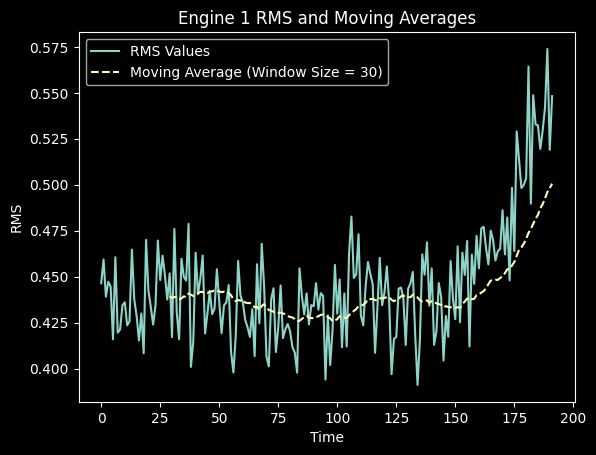

In [ ]:
plot_engine_rms_with_moving_average(1, window_size=30)

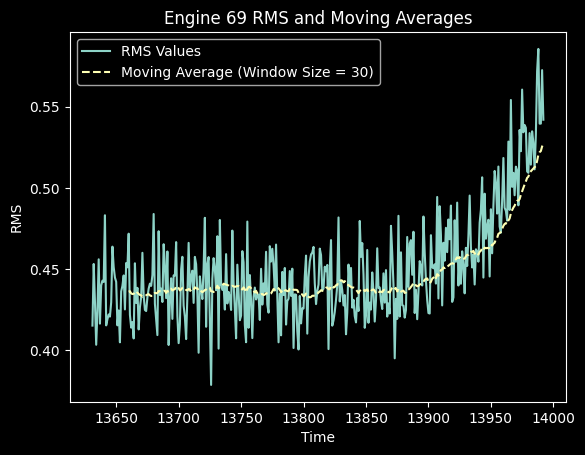

In [ ]:
plot_engine_rms_with_moving_average(69, window_size=30)

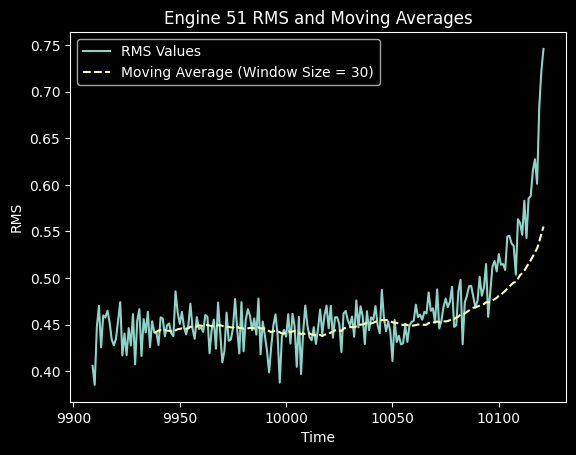

In [ ]:
plot_engine_rms_with_moving_average(51, window_size=30)

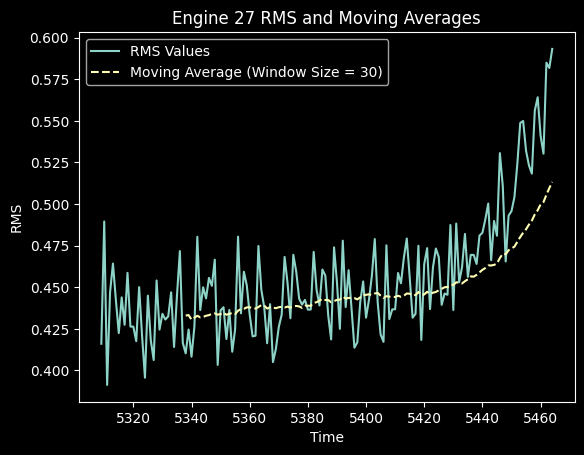

In [ ]:
plot_engine_rms_with_moving_average(27, window_size=30)

In [ ]:
# Plotting the RMS values, moving averages, and double moving averages for the specified engine from the FD001 dataset.

# Parameters:
# engine (int): The engine number for which to plot the RMS values.
# window_size_1 (int): The size of the first moving average window.
# window_size_2 (int): The size of the second moving average window.

def plot_engine_rms_with_double_moving_average(engine, window_size_1, window_size_2=10):
    # Selecting the sensor readings columns
    sensor_columns = [col for col in df.columns if 'Sensor_readings' in col]
    sensor_data = df[sensor_columns]

    def rms(data):

        return np.sqrt(np.mean(data**2, axis=1))

    # Calculate the RMS of the sensor data for the specified engine
    engine_data = sensor_data[df['Engine_Unit_Number'] == engine]
    rms_values = rms(engine_data)

    # Calculate the first moving average of the RMS values
    moving_average_1 = rms_values.rolling(window=window_size_1).mean()

    # Calculate the second moving average of the first moving averages
    moving_average_2 = moving_average_1.rolling(window=window_size_2).mean()

    # Plot the RMS values, moving averages, and double moving averages for the specified engine
    # plt.plot(rms_values, label='RMS Values')
    plt.plot(moving_average_1, label=f'Moving Average 1 (Window Size = {window_size_1})', linestyle='dashed')
    plt.plot(moving_average_2, label=f'Moving Average 2 (Window Size = {window_size_2})', linestyle='dotted')
    plt.xlabel('Time')
    plt.ylabel('RMS')
    plt.title(f'Engine {engine}, Moving Averages, and Double Moving Averages')
    plt.legend()
    plt.show()

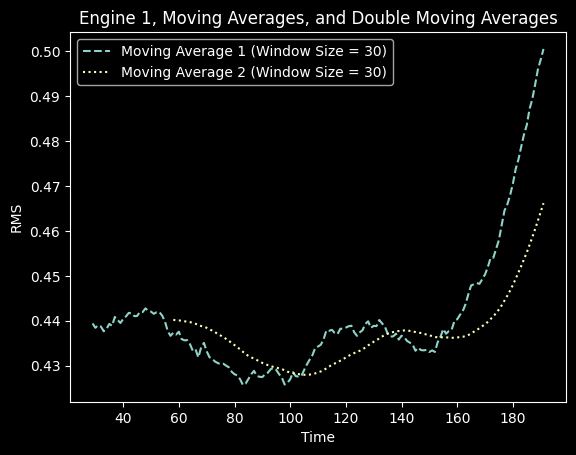

In [ ]:
plot_engine_rms_with_double_moving_average(1, window_size_1 = 30, window_size_2=30)

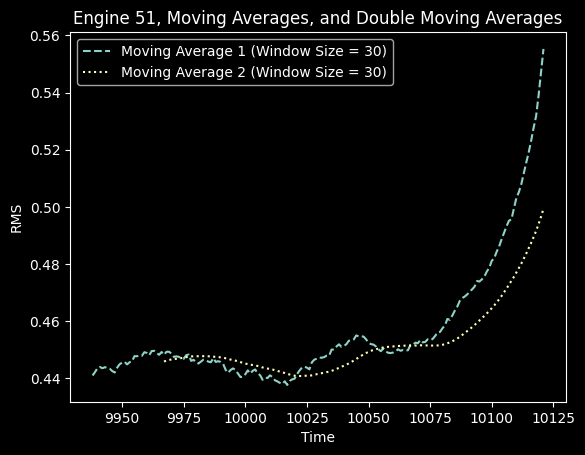

In [ ]:
plot_engine_rms_with_double_moving_average(51, window_size_1 = 30, window_size_2=30)

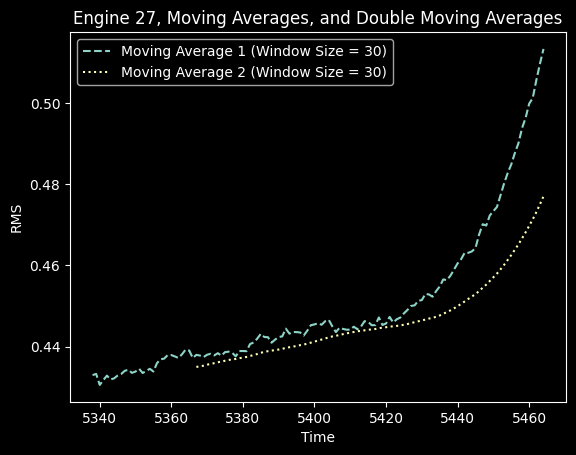

In [ ]:
plot_engine_rms_with_double_moving_average(27, window_size_1 = 30, window_size_2=30)

# **Data Shaping**

In [ ]:
# Function to create sequential samples for each engine
def create_sequences_for_engine(engine_data, sequence_length):
    sequences = []
    for i in range(len(engine_data) - sequence_length + 1):
        sequence = engine_data[i:i+sequence_length].copy()
        sequences.append(sequence)
    return sequences

# Function to preprocess data for each engine
def preprocess_data_for_engine(engine_data, sequence_length):
    # Extract sensor readings and RUL for the engine
    sensor_columns = [col for col in engine_data.columns if col.startswith('Sensor_')]
    sensor_data = engine_data[sensor_columns].values
    rul_data = engine_data['RUL'].values

    # Create sequential samples for the engine
    engine_sequences = create_sequences_for_engine(sensor_data, sequence_length)
    engine_ruls = rul_data[sequence_length - 1:]  # The RUL for the last time step in each sequence

    return engine_sequences, engine_ruls

In [ ]:
# Main code for separating data for each engine and creating sequential samples

# List to store data for each engine
engine_dataframes = []

# Defining the sequence length (number of time steps in each sequence)
sequence_length = 50  # Can be adjusted later, to be used as a hyperparameter

# Grouping the data by 'Engine'.
engine_groups = df.groupby('Engine_Unit_Number')

# Iterating over each engine group and preprocess the data.
for engine_id, engine_data in engine_groups:
    # Sort the data by 'Cycle' (time steps)
    engine_data.sort_values(by = 'Time_In_Cycles', inplace=True)

    # Preprocess data for the current engine
    sequences, ruls = preprocess_data_for_engine(engine_data, sequence_length)

    # Create a new DataFrame to store the preprocessed data for the engine
    engine_df = pd.DataFrame({
        'Engine': engine_id,
        'Sequences': sequences,
        'RULs': ruls
    })

    engine_dataframes.append(engine_df)

# Concatenating data for all engines into a single DataFrame
preprocessed_data = pd.concat(engine_dataframes, ignore_index=True)

# Now, the preprocessed_data DataFrame contains separate sequences and RULs for each engine
# Each row in the 'Sequences' column contains a sequence of sensor readings for one engine
# The corresponding RUL for each sequence is in the 'RULs' column.

preprocessed_data

,Engine,Sequences,RULs
0,1,"[[0.18373493975903443, 0.4068018312622641, 0.3...",142
1,1,"[[0.2831325301204686, 0.45301940265969165, 0.3...",141
2,1,"[[0.34337349397591765, 0.36952256376716974, 0....",140
3,1,"[[0.34337349397591765, 0.25615870939612506, 0....",139
4,1,"[[0.34939759036143414, 0.257466753869636, 0.40...",138
...,...,...,...
15726,100,"[[0.5963855421686901, 0.6064966208851104, 0.63...",4
15727,100,"[[0.45783132530121406, 0.41312404621757537, 0....",3
15728,100,"[[0.5421686746987859, 0.5452365380422961, 0.73...",2
15729,100,"[[0.36746987951806886, 0.6666666666666643, 0.4...",1


In [ ]:
# Calculating the number of sensor readings (features) in each sequence
num_features = len(preprocessed_data['Sequences'][0][0])
num_features

14

# **Models**

In [ ]:
# 'Sensor_readings_2',	'Sensor_readings_3',	'Sensor_readings_4',	'Sensor_readings_7',	'Sensor_readings_8',	'Sensor_readings_9',	'Sensor_readings_11',	'Sensor_readings_12',	'Sensor_readings_13',	'Sensor_readings_14',	'Sensor_readings_15',	'Sensor_readings_17',	'Sensor_readings_20',	'Sensor_readings_21'
#	'RUL'
# 'Engine_Unit_Number',	'Time_In_Cycles'

#  train_x, train_y, test_x, test_y

## **Convolutional Neural Networks**

In [ ]:
# Splitting the data into training and testing sets
train_data, test_data = train_test_split(preprocessed_data, test_size=0.2, random_state=42)

In [ ]:
# Extracting sequences and RULs for training and testing
train_x = np.array(train_data['Sequences'].values.tolist())
train_y = np.array(train_data['RULs'].values.tolist())
test_x = np.array(test_data['Sequences'].values.tolist())
test_y = np.array(test_data['RULs'].values.tolist())

### **Iteration 1**

In [ ]:
# Defining a CNN model architecture
model_CNN_1 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, num_features)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Regression task, so using linear activation for RUL prediction
])

# Model summary
model_CNN_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 32)            1376      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 11, 64)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 704)               0         
                                                                 
 dense (Dense)               (None, 128)               9

In [ ]:
# Compiling the model
model_CNN_1.compile(loss='mean_squared_error', optimizer='adam')

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only = True,
                                                verbose = 1)

# Training the model
batch_size = 32
epochs = 50
model_CNN_1.fit(train_x, train_y,
                batch_size = batch_size,
                epochs = epochs,
                validation_split = 0.2,
                callbacks = [cp_callback])

Epoch 1/50
314/315 [============================>.] - ETA: 0s - loss: 2315.2329
Epoch 1: saving model to training_1/cp.ckpt
315/315 [==============================] - 5s 11ms/step - loss: 2315.1184 - val_loss: 1406.8250
Epoch 2/50
309/315 [============================>.] - ETA: 0s - loss: 1172.1299
Epoch 2: saving model to training_1/cp.ckpt
315/315 [==============================] - 3s 8ms/step - loss: 1172.1180 - val_loss: 963.7007
Epoch 3/50
313/315 [============================>.] - ETA: 0s - loss: 804.2436
Epoch 3: saving model to training_1/cp.ckpt
315/315 [==============================] - 2s 7ms/step - loss: 802.2390 - val_loss: 760.5175
Epoch 4/50
314/315 [============================>.] - ETA: 0s - loss: 710.1591
Epoch 4: saving model to training_1/cp.ckpt
315/315 [==============================] - 2s 7ms/step - loss: 711.4300 - val_loss: 721.5838
Epoch 5/50
315/315 [==============================] - ETA: 0s - loss: 682.8489
Epoch 5: saving model to training_1/cp.ckpt
315/315

In [ ]:
# Evaluating the model on the test set
loss = model_CNN_1.evaluate(test_x, test_y, verbose=0)
print("Mean Squared Error on test set:", loss)

Mean Squared Error on test set: 315.2024841308594


In [ ]:
# Making predictions on the test set
predictions = model_CNN_1.predict(test_x)
predictions

99/99 [==============================] - 0s 3ms/step


array([[121.146706 ],
       [  5.5609584],
       [ 86.974846 ],
       ...,
       [ 13.558102 ],
       [125.651436 ],
       [103.77456  ]], dtype=float32)

In [ ]:
pd.DataFrame(predictions)

,0
0,121.146706
1,5.560958
2,86.974846
3,224.959641
4,50.882416
...,...
3142,-2.038300
3143,4.465618
3144,13.558102
3145,125.651436


### **Iteration 2**

In [ ]:
# Defining a CNN model architecture
model_CNN_2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, num_features)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Regression task, so using linear activation for RUL prediction
])

# Model summary
model_CNN_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 48, 32)            1376      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 24, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 22, 64)            6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 11, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 704)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
# Compiling the model
model_CNN_2.compile(loss='mean_squared_error', optimizer='adam')

checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only = True,
                                                verbose = 1)

# Training the model
batch_size = 32
epochs = 75
model_CNN_2.fit(train_x, train_y,
                batch_size = batch_size,
                epochs = epochs,
                validation_split = 0.2,
                callbacks = [cp_callback])

Epoch 1/75
313/315 [============================>.] - ETA: 0s - loss: 2522.8337
Epoch 1: saving model to training_2/cp.ckpt
315/315 [==============================] - 3s 8ms/step - loss: 2522.0378 - val_loss: 1383.3068
Epoch 2/75
314/315 [============================>.] - ETA: 0s - loss: 1062.3934
Epoch 2: saving model to training_2/cp.ckpt
315/315 [==============================] - 2s 7ms/step - loss: 1062.3572 - val_loss: 842.7245
Epoch 3/75
310/315 [============================>.] - ETA: 0s - loss: 769.6269
Epoch 3: saving model to training_2/cp.ckpt
315/315 [==============================] - 3s 8ms/step - loss: 769.2112 - val_loss: 769.3155
Epoch 4/75
315/315 [==============================] - ETA: 0s - loss: 710.3655
Epoch 4: saving model to training_2/cp.ckpt
315/315 [==============================] - 2s 6ms/step - loss: 710.3655 - val_loss: 728.1162
Epoch 5/75
307/315 [============================>.] - ETA: 0s - loss: 685.8347
Epoch 5: saving model to training_2/cp.ckpt
315/315 

In [ ]:
# Evaluating the model on the test set
loss = model_CNN_2.evaluate(test_x, test_y, verbose=0)
print("Mean Squared Error on test set:", loss)

Mean Squared Error on test set: 249.58770751953125


In [ ]:
# Making predictions on the test set
predictions = model_CNN_2.predict(test_x)
predictions

99/99 [==============================] - 0s 2ms/step


array([[126.84533 ],
       [ 13.455062],
       [ 92.45791 ],
       ...,
       [ 20.056396],
       [127.41003 ],
       [106.92129 ]], dtype=float32)

In [ ]:
pd.DataFrame(predictions)

,0
0,121.171471
1,6.172622
2,83.999840
3,223.016006
4,53.303535
...,...
3142,-0.026745
3143,3.430356
3144,5.830662
3145,127.555229


### **Iteration 3**

In [ ]:
# Defining a CNN model architecture
model_CNN_3 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, num_features)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Regression task, so using linear activation for RUL prediction
])

# Model summary
model_CNN_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 48, 32)            1376      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 24, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 22, 64)            6208      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 11, 64)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 704)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
# Compiling the model
model_CNN_3.compile(loss='mean_squared_error', optimizer='adam')

checkpoint_path = "training_3/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only = True,
                                                verbose = 1)

# Training the model
batch_size = 32
epochs = 100
model_CNN_3.fit(train_x, train_y,
                batch_size = batch_size,
                epochs = epochs,
                validation_split = 0.2,
                callbacks = [cp_callback])

Epoch 1/100
315/315 [==============================] - ETA: 0s - loss: 2394.4363
Epoch 1: saving model to training_3/cp.ckpt
315/315 [==============================] - 3s 8ms/step - loss: 2394.4363 - val_loss: 1376.8239
Epoch 2/100
307/315 [============================>.] - ETA: 0s - loss: 1085.9034
Epoch 2: saving model to training_3/cp.ckpt
315/315 [==============================] - 2s 7ms/step - loss: 1079.2202 - val_loss: 885.1558
Epoch 3/100
307/315 [============================>.] - ETA: 0s - loss: 776.8856
Epoch 3: saving model to training_3/cp.ckpt
315/315 [==============================] - 2s 6ms/step - loss: 774.4765 - val_loss: 760.2922
Epoch 4/100
315/315 [==============================] - ETA: 0s - loss: 724.6103
Epoch 4: saving model to training_3/cp.ckpt
315/315 [==============================] - 2s 6ms/step - loss: 724.6103 - val_loss: 745.3100
Epoch 5/100
310/315 [============================>.] - ETA: 0s - loss: 677.3031
Epoch 5: saving model to training_3/cp.ckpt
315

In [ ]:
# Evaluating the model on the test set
loss = model_CNN_3.evaluate(test_x, test_y, verbose=0)
print("Mean Squared Error on test set:", loss)

Mean Squared Error on test set: 171.29122924804688


In [ ]:
# Making predictions on the test set
predictions = model_CNN_3.predict(test_x)
predictions

99/99 [==============================] - 0s 2ms/step


array([[117.17393 ],
       [  9.804997],
       [ 96.1148  ],
       ...,
       [ 12.907098],
       [135.15334 ],
       [116.13    ]], dtype=float32)

In [ ]:
pd.DataFrame(predictions)

,0
0,117.173927
1,9.804997
2,96.114799
3,270.655090
4,55.482647
...,...
3142,2.319943
3143,2.814305
3144,12.907098
3145,135.153336


# **CNN_LSTM**

In [ ]:
# Hyperparameters
cnn1_filters = 32
cnn1_kernel_size = 3
cnn2_filters = 64
cnn2_kernel_size = 3
dense_units = 128

lstm_units = 64
dense_units = 32

# Defining input shape (sequence length and number of features)
input_shape = (sequence_length, num_features)

# Dual CNN-LSTM Network
input_layer = Input(shape=input_shape)

# CNN Component
model_CNN_1 = Sequential([
    Conv1D(filters=cnn1_filters, kernel_size=cnn1_kernel_size, activation='relu', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=cnn2_filters, kernel_size=cnn2_kernel_size, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=dense_units, activation='relu'),
    Dense(units=1, activation='linear')  # Output layer for regression
])

# LSTM Component
lstm_output = LSTM(units=lstm_units, activation='tanh', return_sequences=True)(input_layer)
lstm_output = LSTM(units=lstm_units, activation='tanh')(lstm_output)

# Combine CNN and LSTM Outputs
combined_output = concatenate([cnn_output, lstm_output])

# Final CNN Layer
final_cnn_output = Conv1D(filters = cnn_filters * 2, kernel_size = cnn_kernel_size, activation='relu')(combined_output)

# Dense Layers for RUL Prediction
dense_output = Dense(units=dense_units, activation='relu')(final_cnn_output)
output_layer = Dense(units=1, activation='linear')(dense_output)  # Output layer for regression

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with an appropriate loss function and optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Print model summary
model.summary()
